In [1]:
# importing the libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
import warnings

warnings.filterwarnings('ignore')


In [2]:
# reading the dataset

df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check the information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# change the column names to lower case

df.columns = df.columns.str.lower()

In [5]:
# check the statistics of the dataset

df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Check the missing values

In [6]:
# create a dataframe with the column name and percentage of missing values in that column

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.head(20)                                                           # print the columns containing missing values

,column_name,percent_missing
poolqc,poolqc,99.520548
miscfeature,miscfeature,96.301370
alley,alley,93.767123
fence,fence,80.753425
fireplacequ,fireplacequ,47.260274
lotfrontage,lotfrontage,17.739726
garageyrblt,garageyrblt,5.547945
garagecond,garagecond,5.547945
garagetype,garagetype,5.547945
garagefinish,garagefinish,5.547945


Some of the null values are explained in the data dictionary. Impute these values using the data dictionary.

In [7]:
# group the columns whose null values have to be imputed with 1 

fill_na_1 = ['alley', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'fireplacequ', 'garagefinish', 'garagequal', 'garagecond', 'poolqc', 'fence']
df[fill_na_1] = df[fill_na_1].fillna(1)

In [8]:
# create a dataframe with the column name and percentage of missing values in that column

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.head(10)                                                           # print the columns containing missing values

,column_name,percent_missing
miscfeature,miscfeature,96.301370
lotfrontage,lotfrontage,17.739726
garagetype,garagetype,5.547945
garageyrblt,garageyrblt,5.547945
masvnrtype,masvnrtype,0.547945
masvnrarea,masvnrarea,0.547945
electrical,electrical,0.068493
kitchenqual,kitchenqual,0.000000
fireplacequ,fireplacequ,0.000000
fireplaces,fireplaces,0.000000


In [9]:
df.electrical.value_counts(dropna=False)

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: electrical, dtype: int64

In [10]:
# print the mode of the column 'electrical'

df.electrical.mode()

0    SBrkr
Name: electrical, dtype: object

Since there is only one missing value, replace the missing value with mode of the column

In [11]:
df['electrical'] = df.electrical.fillna('SBrkr')    # replace nan value with the mode of the column

In [12]:
# check the nan values in the lotfrontage column

df.lotfrontage.value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: lotfrontage, Length: 111, dtype: int64

'lotfrontage' represents the linear feet of street connected to the property.

In [13]:
# fill the nan values with the mean values for the neighborhood

df['lotfrontage'] = df.groupby("neighborhood")["lotfrontage"].transform(lambda x: x.fillna(x.mean()))

In [14]:
# check the masvnrarea column

df.masvnrarea.value_counts(dropna=False)

0.0      861
NaN        8
72.0       8
108.0      8
180.0      8
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: masvnrarea, Length: 328, dtype: int64

In [15]:
# impute the missing values with the median for 'masvnrarea'

df['masvnrarea'] = df.masvnrarea.fillna(df.masvnrarea.median())

In [16]:
# check the miscfeature column

df.miscfeature.value_counts(dropna=False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: miscfeature, dtype: int64

According to data dictionary, nan value represents 'None' which mean that the record has no misc feature

In [17]:
df['miscfeature'] = df.miscfeature.fillna('None')       # replace the nan value with 'None'

In [18]:
# check the garagetype column

df.garagetype.value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: garagetype, dtype: int64

According to data dictionary, nan values actually represents that there is no garage.

In [19]:
# impute the missing value with the corresponding value from the data dictionary

df['garagetype'] = df.garagetype.fillna('NoGarage')

In [20]:
# check the missing values in the garage year built column

df.garageyrblt.value_counts(dropna=False)

NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: garageyrblt, Length: 98, dtype: int64

In [21]:
df.corr()['garageyrblt'].sort_values(ascending=False).head()            # check whether the column is highly correlated with any other column

garageyrblt     1.000000
yearbuilt       0.825667
yearremodadd    0.642277
garagecars      0.588920
garagearea      0.564567
Name: garageyrblt, dtype: float64

Since the garage year built is highly correlated with year built, we'll use 'yearbuilt' column to impute the missing values.

In [22]:
# impute the missing values with values from yearbuilt column since these two columns are highly correlated

df['garageyrblt'] = df.garageyrblt.fillna(df.yearbuilt)         

In [23]:
# check the missing values in the masvnrtype column

df.masvnrtype.value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: masvnrtype, dtype: int64

According to data dictionary, nan values in this column represent the label 'None'

In [24]:
# impute the missing values with the label 'None'

df['masvnrtype'] = df.masvnrtype.fillna('None')

In [25]:
# check for any nan values in the dataframe

# create a dataframe with the column name and percentage of missing values in that column

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df.head(10)                                                           # print the columns containing missing values

,column_name,percent_missing
id,id,0.0
centralair,centralair,0.0
garageyrblt,garageyrblt,0.0
garagetype,garagetype,0.0
fireplacequ,fireplacequ,0.0
fireplaces,fireplaces,0.0
functional,functional,0.0
totrmsabvgrd,totrmsabvgrd,0.0
kitchenqual,kitchenqual,0.0
kitchenabvgr,kitchenabvgr,0.0


All of the missing values are imputed and there are no more missing values

# EDA

In [26]:
# check the shape of the cleaned df

df.shape

(1460, 81)

In [27]:
# check the id column

df.id.nunique()

1460

Drop the id column since it contains only unique values and hence unnecessary for our goals.

In [28]:
df = df.drop('id', axis=1)              # drop the id column

In [29]:
df = df.drop(['poolqc','miscval', 'alley', 'roofmatl', 'condition2', 'heating', 'garagecond', 'fence', 'functional' ], axis = 1)


In [30]:
# check the correlation between the target variable and independent variables

df.corr().saleprice.sort_values(ascending=False).head()

saleprice      1.000000
overallqual    0.790982
grlivarea      0.708624
garagecars     0.640409
garagearea     0.623431
Name: saleprice, dtype: float64

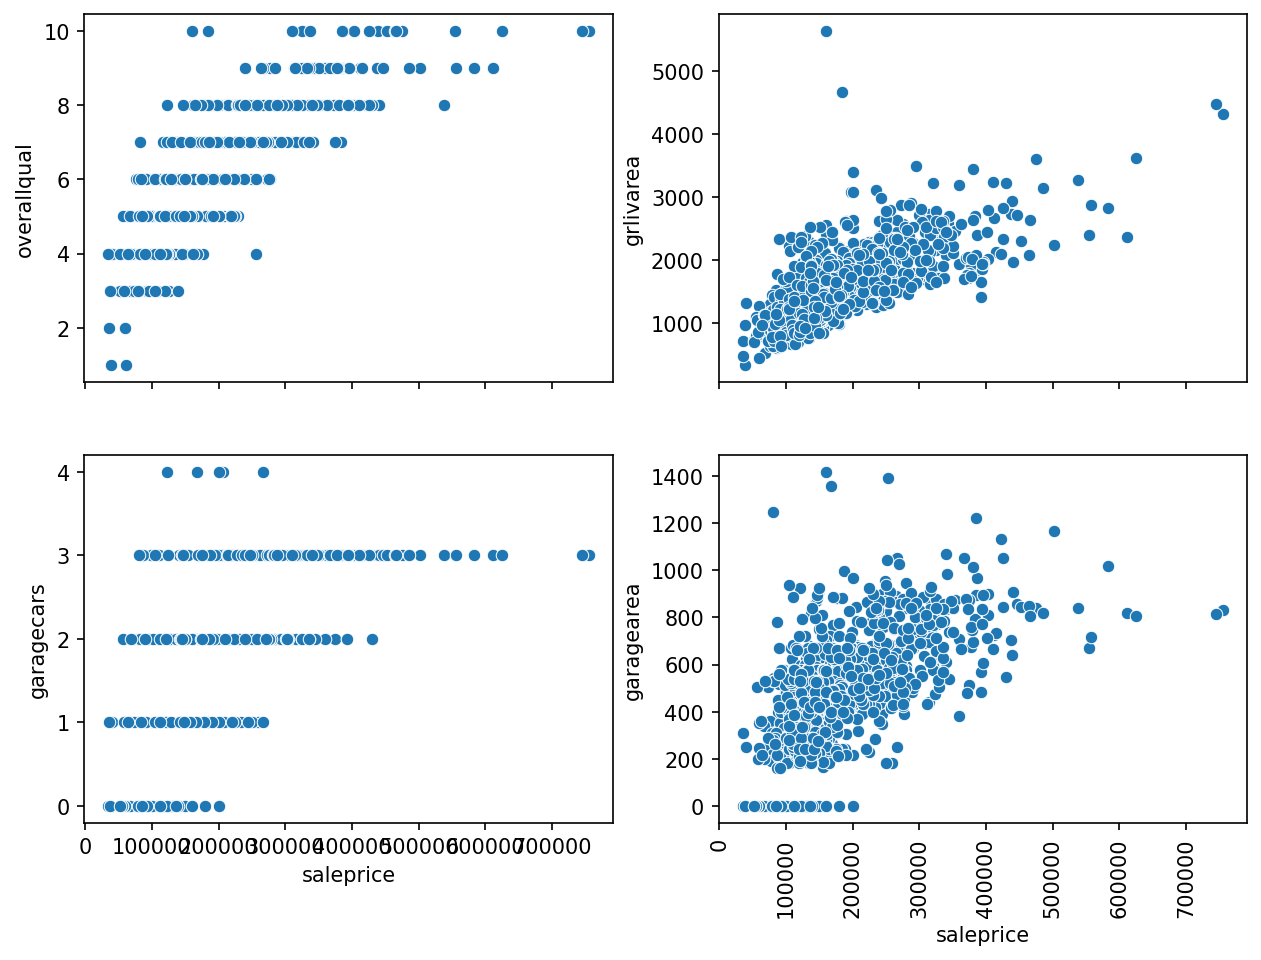

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(10,7), dpi=150, sharex=True)
sns.scatterplot(df.saleprice, df.overallqual, ax=axes[0, 0])
sns.scatterplot(df.saleprice, df.grlivarea, ax=axes[0, 1])
sns.scatterplot(df.saleprice, df.garagecars, ax=axes[1,0])
sns.scatterplot(df.saleprice, df.garagearea, ax=axes[1,1])
plt.xticks(rotation=90)
plt.show()

These variables show somewhat of a linear relationship with the target variable.

In [32]:
# check the correlation between the target variable and independent variables

df.corr().saleprice.sort_values(ascending=True).head()

kitchenabvgr    -0.135907
enclosedporch   -0.128578
mssubclass      -0.084284
overallcond     -0.077856
yrsold          -0.028923
Name: saleprice, dtype: float64

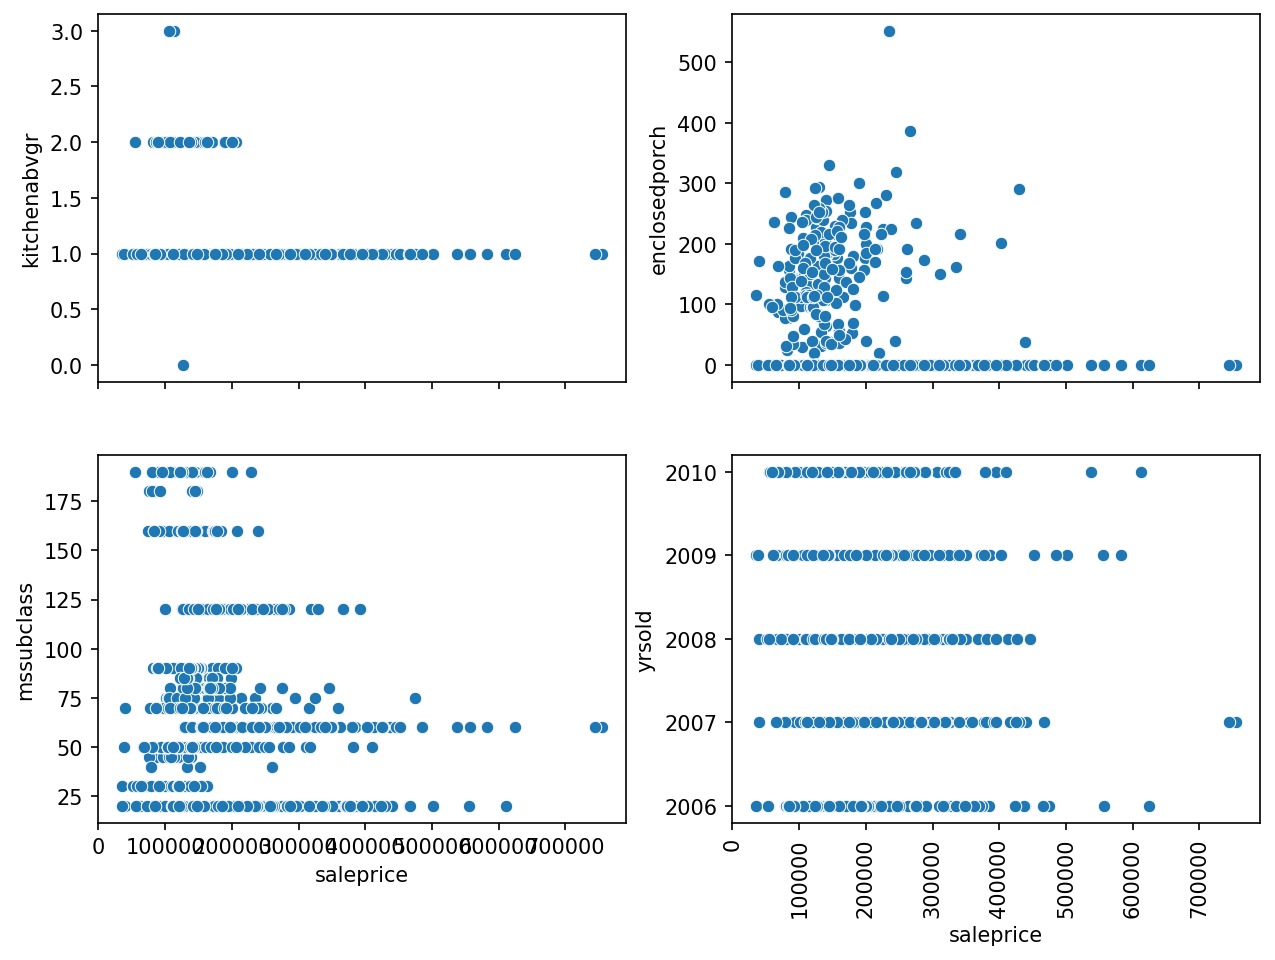

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(10,7), dpi=150, sharex=True)
sns.scatterplot(df.saleprice, df.kitchenabvgr, ax=axes[0, 0])
sns.scatterplot(df.saleprice, df.enclosedporch, ax=axes[0, 1])
sns.scatterplot(df.saleprice, df.mssubclass, ax=axes[1,0])
sns.scatterplot(df.saleprice, df.yrsold, ax=axes[1,1])
plt.xticks(rotation=90)
plt.show()

The above plot shows the variables which are highly negatively correlated with the target variables. 

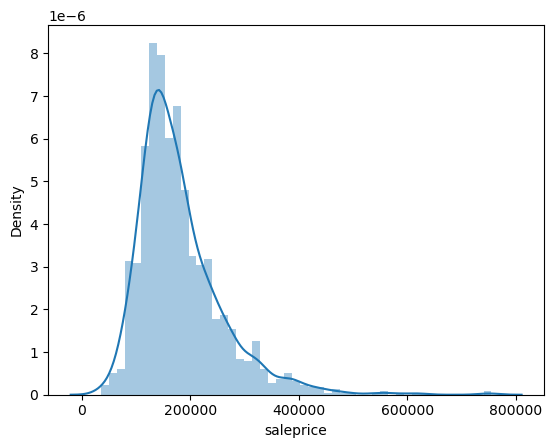

In [34]:
# check the target variable

sns.distplot(df.saleprice)
plt.show()

We can log transformation to make the distribution an approximate normal distribution

In [35]:
#df['saleprice'] = np.log(df.saleprice)

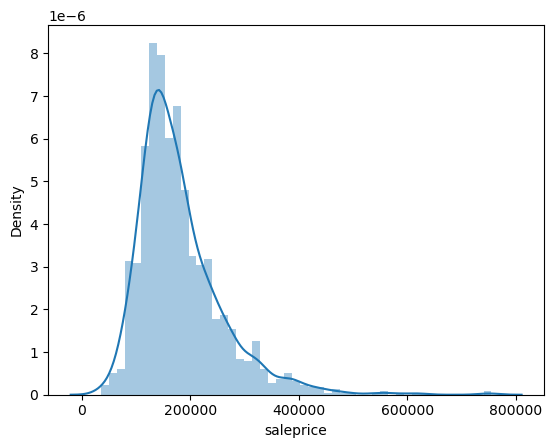

In [36]:
# check the log transformation of the target variable

sns.distplot(df.saleprice)
plt.show()

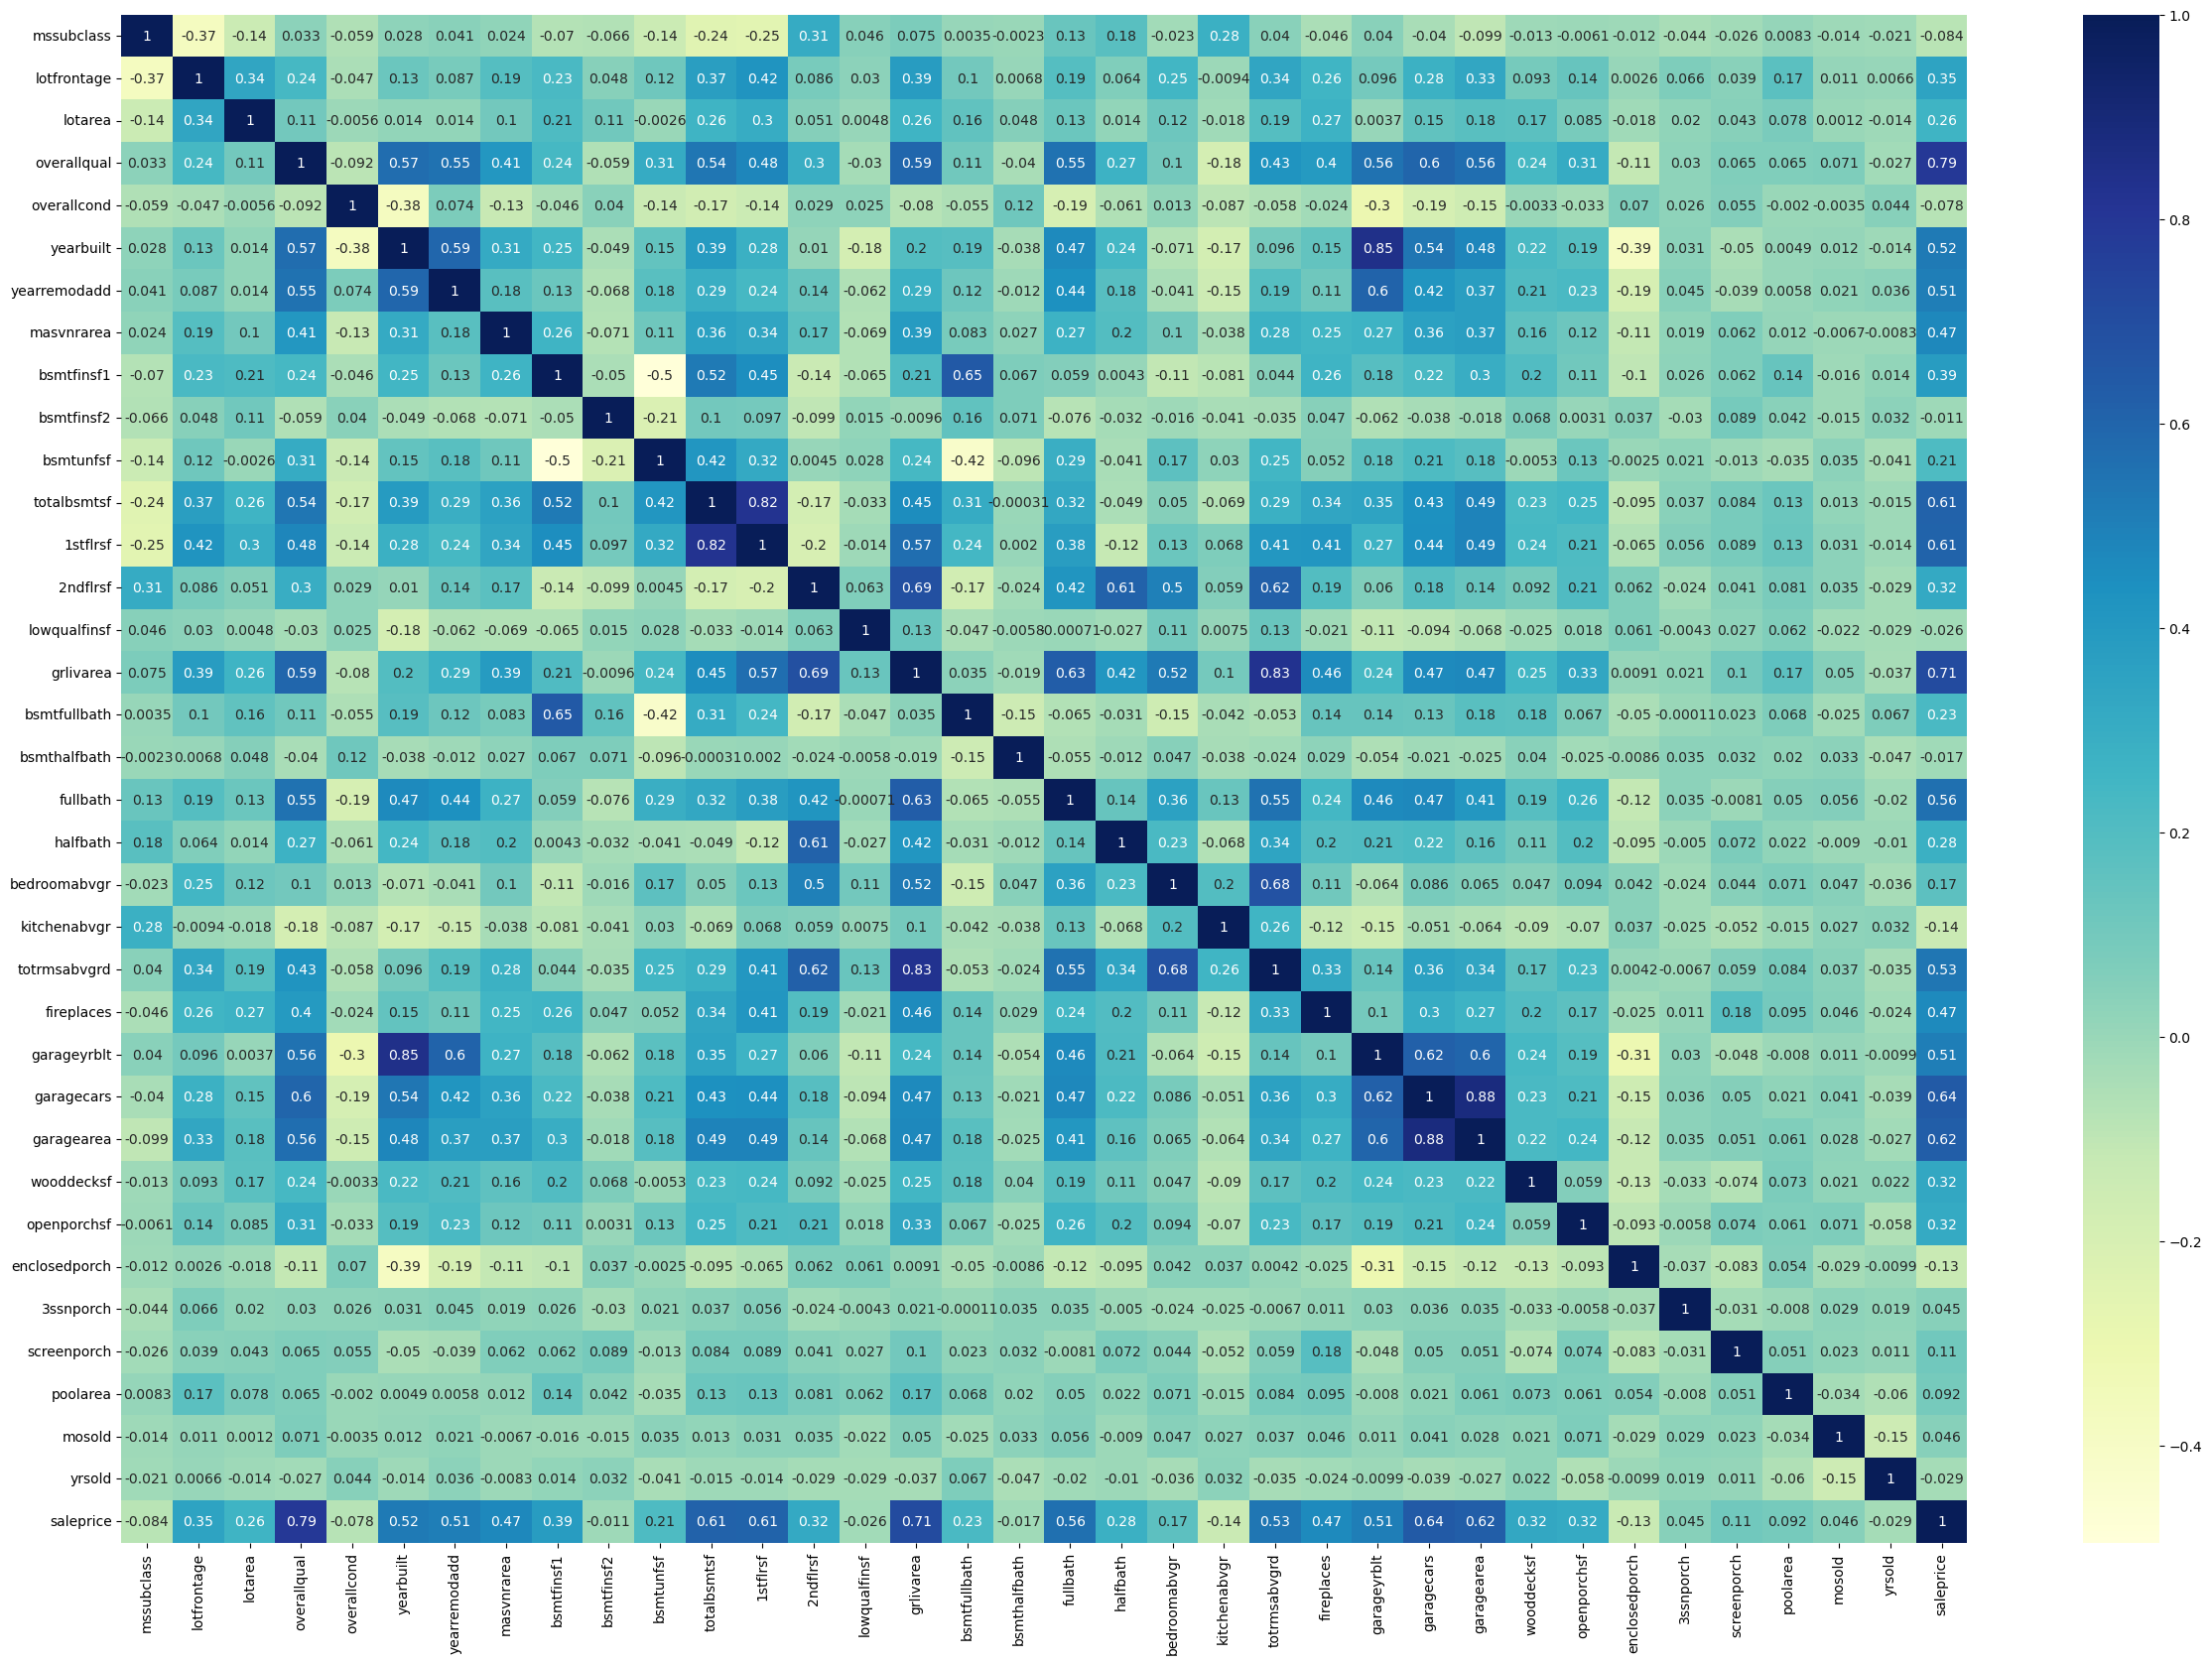

In [37]:
# check the correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [38]:
# check the collinearity of the target variable with independent variables

df.corr().saleprice.abs().sort_values(ascending=False).head(100)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
1stflrsf         0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
garageyrblt      0.508043
yearremodadd     0.507101
masvnrarea       0.472614
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.346962
wooddecksf       0.324413
2ndflrsf         0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
3ssnporch        0.044584
yrsold           0.028923
lowqualfinsf     0.025606
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64

In [39]:
# check for multicollinearity between the independent variables 

corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))
sol.head(20)

garagecars    garagearea      0.882475
yearbuilt     garageyrblt     0.845141
grlivarea     totrmsabvgrd    0.825489
totalbsmtsf   1stflrsf        0.819530
overallqual   saleprice       0.790982
grlivarea     saleprice       0.708624
2ndflrsf      grlivarea       0.687501
bedroomabvgr  totrmsabvgrd    0.676620
bsmtfinsf1    bsmtfullbath    0.649212
garagecars    saleprice       0.640409
grlivarea     fullbath        0.630012
garagearea    saleprice       0.623431
garageyrblt   garagecars      0.619897
2ndflrsf      totrmsabvgrd    0.616423
totalbsmtsf   saleprice       0.613581
2ndflrsf      halfbath        0.609707
1stflrsf      saleprice       0.605852
yearremodadd  garageyrblt     0.604353
garageyrblt   garagearea      0.602803
overallqual   garagecars      0.600671
dtype: float64

In [40]:
# drop the variables which have high collinearity with other independent variables
df = df.drop(['garagearea', 'garageyrblt', 'totrmsabvgrd', '1stflrsf'], axis=1)

Derive a feature 'age of the property' which is the difference between the year the house was built and the year it was sold

In [41]:
# create a new column 'propage'

df['propage'] = df['yrsold'] - df['yearbuilt']

<AxesSubplot:xlabel='mosold', ylabel='saleprice'>

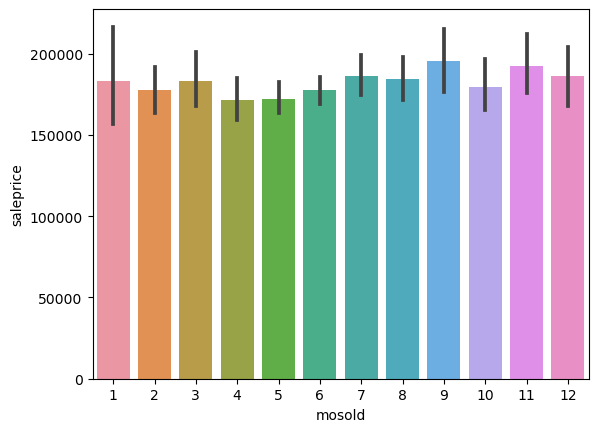

In [42]:
sns.barplot(df.mosold, df.saleprice)

<AxesSubplot:xlabel='yrsold', ylabel='saleprice'>

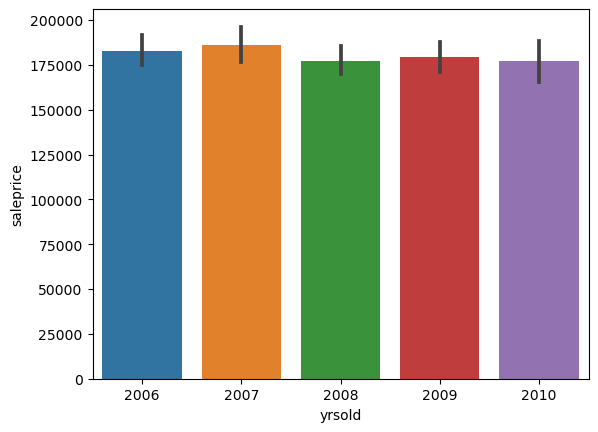

In [43]:
sns.barplot(df.yrsold, df.saleprice)

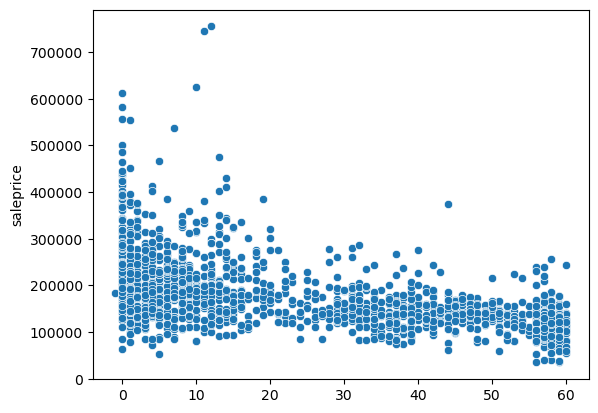

In [44]:
sns.scatterplot((df.yrsold - df.yearremodadd), df.saleprice)
plt.show()

We can see that the house which was recently renovated has sold for a higher price.

In [45]:
df['modage'] = df.yrsold - df.yearremodadd

Drop the yearbuilt, yearremodadd, yrsold and mosold column as they don't add any more information to the analysis

In [46]:
df = df.drop(['yearbuilt', 'yearremodadd', 'yrsold', 'mosold'], axis=1)         # drop the unnecessary columns

According to data dictionary overallcond, overallqual and mssubclass are categorical but are labelled using integer values.
Change their datatype to object datatype

In [47]:
df[['overallcond', 'overallqual', 'mssubclass']] = df[['overallcond', 'overallqual', 'mssubclass']].astype('object')    # check the columns

In [48]:
cols_num = list(df.select_dtypes(include=['int', 'float']).columns)         # create a list of all numerical columns
cols_obj = list(df.select_dtypes(include= 'object').columns)                # create a list of all categorical columns

Convert unordered categorical variables into numeric by using dummy variables

In [49]:
df = pd.get_dummies(data=df, columns=cols_obj, drop_first=True)             # create dummy variables

## Data preparation

In [50]:
# put all the independent variables to X and target variable to y

X = df.drop('saleprice', axis=1)
y = df['saleprice']

In [51]:
# splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [52]:
# remove the saleprice from the cols_num list

cols_num.remove('saleprice')

In [53]:
# scale all the continuous variables using the standard scaler

scaler = StandardScaler()
X_train[cols_num] = scaler.fit_transform(X_train[cols_num])
X_test[cols_num] = scaler.transform(X_test[cols_num])

In [54]:
X_train.head()

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,2ndflrsf,lowqualfinsf,grlivarea,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
175,0.590416,0.166080,-0.575015,0.085426,-0.283127,0.361507,0.347365,-0.797551,-0.121406,1.229791,...,0,0,0,0,1,0,0,0,1,0
1408,-0.454807,-0.261043,-0.575015,-0.943351,-0.283127,0.126620,-0.973680,0.630928,-0.121406,-0.279140,...,0,0,0,0,1,0,0,0,1,0
1148,-0.333343,-0.439778,-0.575015,-0.943351,-0.283127,0.012597,-1.087563,0.440311,-0.121406,-0.757443,...,0,0,0,0,1,0,0,0,1,0
861,0.198458,0.079341,-0.575015,0.870488,-0.283127,-0.840294,-0.023894,-0.797551,-0.121406,-0.894101,...,0,0,0,0,1,0,0,0,1,0
220,0.111356,-0.151525,-0.575015,-0.943351,-0.283127,2.124300,1.021554,-0.797551,-0.121406,-0.022906,...,0,0,1,0,0,0,0,0,0,1


In [55]:
X_test.head()

,lotfrontage,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,2ndflrsf,lowqualfinsf,grlivarea,...,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
930,0.111356,-0.157219,-0.575015,-0.908843,-0.283127,2.014838,0.948668,-0.797551,-0.121406,-0.083643,...,0,0,0,0,1,0,0,0,1,0
530,0.633967,-0.045510,0.665496,0.745395,-0.283127,0.254326,0.937280,-0.797551,-0.121406,-0.002028,...,0,0,0,0,1,0,0,0,0,0
1291,-2.153295,-0.791991,0.943053,-0.445138,-0.283127,-0.381922,-0.955459,0.745757,-0.121406,-0.394920,...,0,0,0,0,1,0,0,0,1,0
1385,-1.325826,-0.462909,-0.575015,0.641871,-0.283127,-1.152716,-0.577367,0.024628,-0.121406,-0.675828,...,0,0,0,0,1,0,0,0,1,0
305,0.416213,-0.029214,0.818435,2.214152,-0.283127,-0.069499,2.164941,-0.797551,-0.121406,0.929903,...,0,0,0,0,1,0,0,0,1,0


## Model Building

### Linear Regression

In [56]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-1.0334686826755875e+17
[-4.80710058e+03  7.40464123e+03  4.03209841e+03  2.90941707e+16
  1.01113791e+16  2.75160935e+16 -2.75498324e+16  1.24067945e+04
 -1.17734248e+02  2.70820000e+04  4.62350000e+03  7.88375000e+02
  5.01125000e+03  9.66000000e+02 -1.37000000e+03 -4.35200000e+03
  1.11000000e+03  1.02197500e+04  5.96000000e+02  2.81250000e+02
  5.46000000e+02  1.57800000e+03  2.31200000e+03 -1.94600000e+03
 -5.91200000e+03 -2.01200000e+03 -8.92937500e+02 -1.81749375e+04
 -3.11402754e+04  1.12605000e+04 -9.73825000e+03  1.08950000e+03
  3.76171250e+04 -1.05731250e+04 -2.98193750e+03  4.79889753e+15
 -8.34150000e+03 -1.74873750e+04 -1.15863750e+04  3.46247500e+04
  5.09977500e+04  3.94606250e+04  3.69100000e+04  2.90880000e+04
  1.32224062e+04  2.73218750e+03 -2.48172500e+04  5.25000000e+01
  7.65962500e+03  4.52862500e+03  1.42236875e+04 -6.50393203e+04
  1.11300000e+04 -9.10962500e+03 -2.71550625e+04 -1.28125000e+03
  8.70025000e+03 -2.36636875e+04 -1.80379531e+04 -2.29312500e+03
 

In [58]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9112712974180871
-1.5199129313946223e+20
592152292615.0
3.8486059390764366e+32
579972862.5024486
8.786771550402823e+29


### Ridge Regression

In [59]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [61]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.14055132e+03  4.77749362e+03  6.40901624e+03  1.25281211e+03
  1.90806284e+03  1.85340111e+03  3.87447127e+03  1.09717702e+04
 -1.39366017e+03  2.33447350e+04  3.26605923e+03  2.12675907e+02
  6.77917254e+03  1.85868304e+03 -1.54999002e+03 -5.64299853e+03
  3.08840052e+03  1.05151785e+04  1.27948616e+03  2.00566528e+02
  5.75623619e+02  1.22514375e+03  2.25495081e+03 -1.33742897e+03
 -5.95655220e+03 -4.65991267e+03 -1.10164259e+01 -6.86312718e+02
  3.64202756e+03  5.91750744e+02 -1.52067108e+03  2.10448230e+03
 -1.45945608e+03 -6.16610553e+02 -2.99707452e+02  1.44841856e+03
 -5.95918473e+03 -1.00034562e+04 -2.99103226e+03 -1.82542334e+03
  4.24545748e+03  2.11949929e+03  4.02835711e+03 -4.75805821e+03
  3.17780817e+03  4.54931850e+03 -9.96457514e+03 -6.74732872e+02
  4.68274943e+03 -1.84516730e+03  5.86520238e+03 -1.24544030e+03
  6.60249841e+03 -5.57293370e+03 -1.45933052e+03 -1.40792786e+03
  2.23974660e+03 -6.38667357e+03 -1.91632028e+02  1.16557132e+03
  2.70096590e+03 -1.40458

In [62]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8905765012584476
0.8423795600730971
730263981781.3949
399114283912.24066
715243860.7065572
911219826.2836545


### Lasso Regression

In [63]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [65]:
#Fitting Lidge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [66]:
lasso.coef_

array([-4.00719023e+03,  5.32858289e+03,  4.08947187e+03, -0.00000000e+00,
        1.18718486e+03,  1.12986724e+03,  9.10010774e+02,  9.24884751e+03,
       -1.36399679e+03,  2.51384857e+04,  3.96559213e+03,  5.00996806e+02,
        5.69465932e+03,  1.28476687e+03, -1.14593704e+03, -4.84546154e+03,
        2.50990058e+03,  8.95140963e+03,  7.59703836e+02, -0.00000000e+00,
        2.56475423e+02,  1.02708428e+03,  2.35440830e+03, -1.51136543e+03,
       -6.83693744e+03, -3.30465436e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  2.85064580e+02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -2.80422980e+03, -0.00000000e+00, -7.26648989e+02,
        1.31326864e+03,  0.00000000e+00,  0.00000000e+00, -6.50191805e+03,
        0.00000000e+00,  4.89234380e+03, -1.67888569e+04, -0.00000000e+00,
        1.00543177e+03, -0.00000000e+00,  5.91041549e+03, -0.00000000e+00,
        7.29697636e+03, -

In [67]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.899989238018276
0.8502189994119599
667445823846.8948
379263862104.9251
653717751.0743338
865899228.5500573


### Let's see the changes in the coefficients after regularization

In [68]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [69]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Linear,Ridge,Lasso
lotfrontage,-4.807101e+03,-3140.551316,-4007.190226
lotarea,7.404641e+03,4777.493617,5328.582891
masvnrarea,4.032098e+03,6409.016236,4089.471868
bsmtfinsf1,2.909417e+16,1252.812105,-0.000000
bsmtfinsf2,1.011138e+16,1908.062842,1187.184862
bsmtunfsf,2.751609e+16,1853.401111,1129.867245
totalbsmtsf,-2.754983e+16,3874.471273,910.010774
2ndflrsf,1.240679e+04,10971.770197,9248.847510
lowqualfinsf,-1.177342e+02,-1393.660174,-1363.996787
grlivarea,2.708200e+04,23344.735014,25138.485688


## Doubling the alpha value for both lasso and ridge regression and observing the changes.

In [70]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.41420412e+03  4.20965645e+03  7.13044687e+03  2.50031137e+03
  1.80709677e+03  2.21249882e+03  5.51350181e+03  1.00101917e+04
 -1.38742579e+03  2.21780467e+04  2.93893746e+03  7.55423330e+01
  6.97185880e+03  1.92952109e+03 -1.53703522e+03 -5.83604312e+03
  3.57878620e+03  1.07201294e+04  1.52339132e+03  3.95327160e+02
  5.36703039e+02  1.08807719e+03  2.38355602e+03 -1.73760968e+03
 -5.37962562e+03 -5.62110557e+03  3.93914319e+01 -1.42702077e+02
  2.30145381e+03  5.88022404e+02 -6.21278747e+02  1.57475005e+03
 -8.28664898e+02 -7.23199076e+02 -3.12818033e+02  8.68936753e+02
 -4.46557923e+03 -7.84140927e+03 -1.68620714e+03 -1.47295195e+03
  2.50289543e+03  1.22224002e+03  3.89126714e+03 -4.71896628e+03
  1.83303536e+03  3.41837848e+03 -6.70238811e+03 -1.29615948e+03
  3.37892239e+03 -1.24109729e+03  3.74003663e+03 -7.09258434e+02
  5.49479106e+03 -3.77542973e+03 -6.20539660e+02 -1.23400755e+03
  1.55044683e+03 -3.57249859e+03 -9.75261210e+01  1.15873147e+02
  2.79559488e+03 -1.23028

In [71]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.8786035965455518
0.8340608501094506
810168035021.1794
420178277717.575
793504441.744544
959311136.3414955


In [72]:
#Fitting Lidge model for alpha = 200 and printing coefficients which have been penalised

alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=200)

In [73]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.8898075357020124
0.8479921052187426
735395857983.063
384902631300.6362
720270184.1166141
878773130.8233703


In [74]:
betas2 = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas2['Ridge2'] = ridge.coef_
betas2['Lasso2'] = lasso.coef_

In [75]:
betas_combined = pd.merge(betas, betas2, left_index=True, right_index=True)

In [76]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rg_metric2 = pd.Series(metric4, name = 'Ridge w *2 alpha')
ls_metric2 = pd.Series(metric5, name = 'Lasso w *2 alpha')

final_metric = pd.concat([lr_metric, rg_metric, rg_metric2, ls_metric, ls_metric2], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Ridge w *2 alpha,Lasso Regression,Lasso w *2 alpha
0,R2 Score (Train),9.112713e-01,8.905765e-01,8.786036e-01,8.999892e-01,8.898075e-01
1,R2 Score (Test),-1.519913e+20,8.423796e-01,8.340609e-01,8.502190e-01,8.479921e-01
2,RSS (Train),5.921523e+11,7.302640e+11,8.101680e+11,6.674458e+11,7.353959e+11
3,RSS (Test),3.848606e+32,3.991143e+11,4.201783e+11,3.792639e+11,3.849026e+11
4,MSE (Train),2.408263e+04,2.674404e+04,2.816921e+04,2.556790e+04,2.683785e+04
5,MSE (Test),9.373778e+14,3.018642e+04,3.097275e+04,2.942617e+04,2.964411e+04


In [77]:
betas_combined['Lasso2'].sort_values(ascending=False)

overallqual_10           75278.859108
overallqual_9            66311.727569
neighborhood_NoRidge     33139.136791
grlivarea                25995.707396
neighborhood_StoneBr     21291.659760
bsmtqual_Ex              20344.478487
overallqual_8            20221.515404
neighborhood_Crawfor     18005.231677
bsmtexposure_Gd          15404.749930
neighborhood_NridgHt     13224.313400
exterior1st_BrkFace      12990.792861
saletype_New             11887.262643
housestyle_1Story         9983.006949
garagecars                8965.489258
2ndflrsf                  7320.164654
bsmtfintype1_GLQ          6334.997726
lotconfig_CulDSac         5950.398379
condition1_Norm           5797.800047
neighborhood_Somerst      5642.044280
fullbath                  5324.011269
lotarea                   4356.685742
overallcond_7             4302.677664
masvnrarea                4169.706333
bsmtcond_TA               3841.885103
overallqual_7             3553.498888
roofstyle_Hip             3530.473734
landcontour_

In [78]:
# print the features and their coefficients

betas_combined.Lasso.sort_values(ascending=False)

overallqual_10           86335.434206
overallqual_9            69544.356056
neighborhood_NoRidge     37167.770245
neighborhood_StoneBr     26821.276143
grlivarea                25138.485688
overallqual_8            23211.350191
neighborhood_Crawfor     21275.555964
bsmtexposure_Gd          18436.058014
bsmtqual_Ex              18263.774463
exterior2nd_ImStucc      16440.092525
neighborhood_NridgHt     15929.796035
exterior1st_BrkFace      15838.208535
saletype_New             14816.889101
housestyle_1Story        13546.425760
overallcond_9            10118.019948
2ndflrsf                  9248.847510
garagecars                8951.409632
neighborhood_Somerst      8007.507136
housestyle_1.5Unf         7425.260190
lotconfig_CulDSac         7296.976363
bsmtfintype2_ALQ          6911.380215
condition1_Norm           6903.713935
overallqual_7             6858.444901
overallcond_8             6811.472331
bsmtfintype1_GLQ          5991.664319
landcontour_Lvl           5910.415494
masvnrtype_N

## Conclusion

 The variables which are significant in predicting the price of a house are:
| Feature | Coefficient |
| --- | --- |
|overallqual_10       |   86335.434206|
|overallqual_9         |  69544.356056|
|neighborhood_NoRidge   | 37167.770245|
|neighborhood_StoneBr   | 26821.276143|
|overallcond_3         | -25326.296335|